In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.000,4,Married,Franklin,IT,Conceptual,4.000,4,...,type2,3.000,4,0.752,1.869,2.000,4,5,3,0.184
1,EID_18000,M,24.000,3,Single,Springfield,Logistics,Analytical,5.000,4,...,type2,4.000,3,-0.961,-0.454,2.000,3,5,3,0.067
2,EID_3891,F,58.000,3,Married,Clinton,Quality,Conceptual,27.000,3,...,type2,1.000,4,-0.961,-0.454,3.000,3,8,3,0.085
3,EID_17492,F,26.000,3,Single,Lebanon,Human Resource Management,Behavioral,4.000,3,...,type2,1.000,3,-1.818,-0.454,nan,3,7,3,0.067
4,EID_22534,F,31.000,1,Married,Springfield,Logistics,Conceptual,5.000,4,...,type3,3.000,1,0.752,-0.454,2.000,2,8,2,0.183


In [4]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.000,5,Single,Springfield,R&D,Conceptual,7.000,4,...,4.000,type2,1.000,3,-0.961,-0.454,2.000,1,8,4
1,EID_9658,M,65.000,2,Single,Lebanon,IT,Directive,41.000,2,...,1.000,type2,1.000,4,-0.961,0.708,1.000,2,8,2
2,EID_22203,M,52.000,3,Married,Springfield,Sales,Directive,21.000,3,...,8.000,type3,1.000,4,-0.105,0.708,2.000,1,9,3
3,EID_7652,M,50.000,5,Single,Washington,Marketing,Analytical,11.000,4,...,2.000,type0,4.000,3,-0.105,0.708,2.000,2,8,3
4,EID_6516,F,44.000,3,Married,Franklin,R&D,Conceptual,12.000,4,...,2.000,type2,4.000,4,1.608,0.708,2.000,2,7,4


In [5]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Employee_ID']
test_ID = test['Employee_ID']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Employee_ID", axis = 1, inplace = True)
test.drop("Employee_ID", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (7000, 24) 
The test data size before dropping Id feature is : (3000, 23) 

The train data size after dropping Id feature is : (7000, 23) 
The test data size after dropping Id feature is : (3000, 22) 


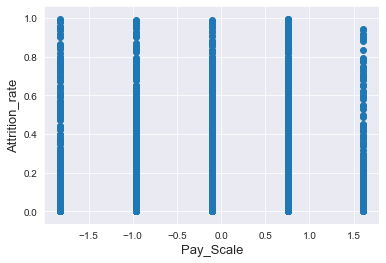

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['VAR2'], y = train['Attrition_rate'])
plt.ylabel('Attrition_rate', fontsize=13)
plt.xlabel('Pay_Scale', fontsize=13)
plt.show()

C:\Users\DELL\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 0.19 and sigma = 0.19



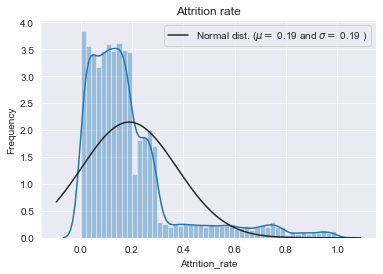

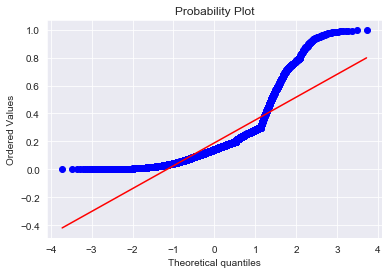

In [7]:
sns.distplot(train['Attrition_rate'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Attrition_rate'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Attrition rate')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Attrition_rate'], plot=plt)
plt.show()


 mu = 0.16 and sigma = 0.14



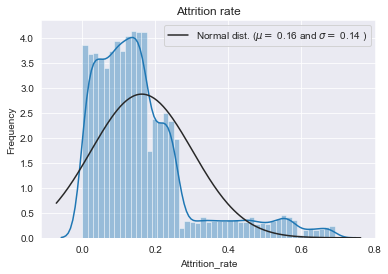

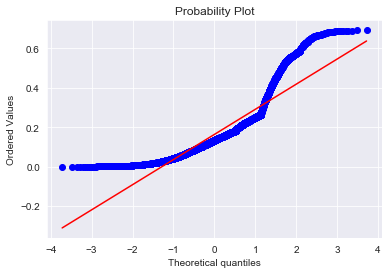

In [8]:
train["Attrition_rate"] = np.log1p(train["Attrition_rate"])

#Check the new distribution 
sns.distplot(train['Attrition_rate'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Attrition_rate'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Attrition rate')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Attrition_rate'], plot=plt)
plt.show()

In [31]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Attrition_rate.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Attrition_rate'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (10000, 22)


In [32]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:10]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
VAR4,9.540
VAR2,7.940
Age,5.730
Time_of_service,1.960
Work_Life_balance,0.160
Pay_Scale,0.120


Text(0.5, 1.0, 'Percent missing data by feature')

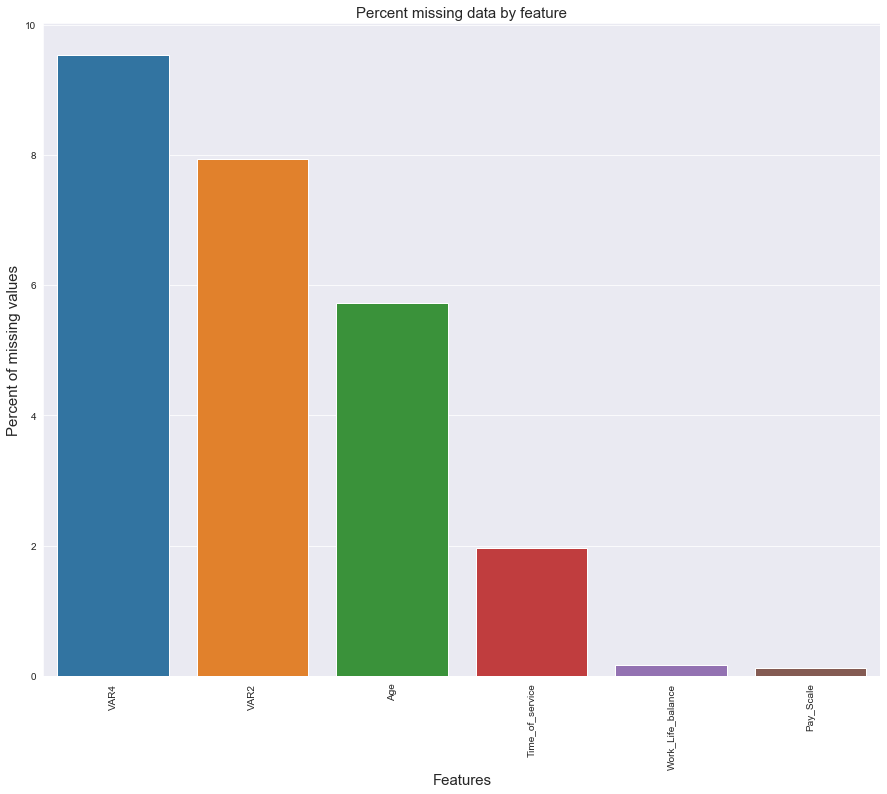

In [33]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

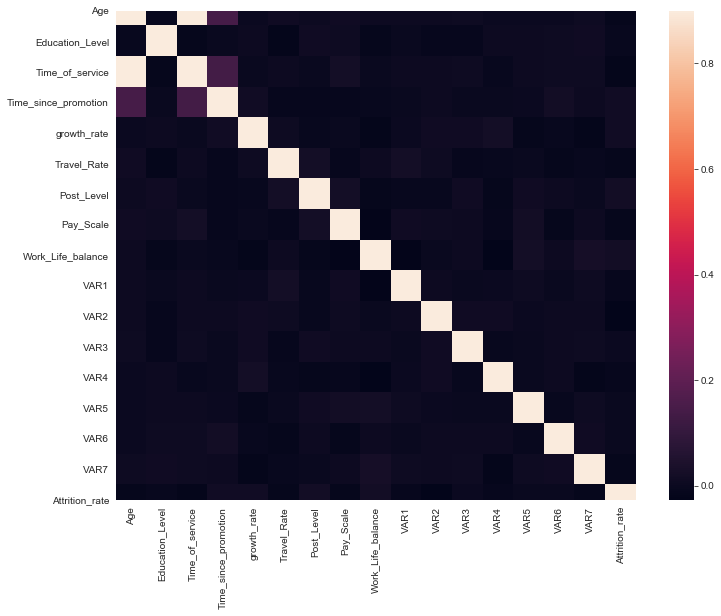

In [34]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [35]:
all_data.columns

Index(['Age', 'Compensation_and_Benefits', 'Decision_skill_possess',
       'Education_Level', 'Gender', 'Hometown', 'Pay_Scale', 'Post_Level',
       'Relationship_Status', 'Time_of_service', 'Time_since_promotion',
       'Travel_Rate', 'Unit', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Work_Life_balance', 'growth_rate'],
      dtype='object')

In [36]:
#all_data.dtypes

In [37]:
all_data['Age'].fillna(all_data['Age'].median(), inplace = True)

In [38]:
#all_data.VAR4.value_counts(dropna=False)

In [39]:
#all_data.VAR2.value_counts(dropna=False)

In [40]:
#all_data.Time_of_service.value_counts(dropna=False)

In [41]:
#all_data.Work_Life_balance.value_counts(dropna=False)

In [42]:
#all_data.Pay_Scale.value_counts(dropna=False)

In [43]:
all_data.fillna(-99,inplace=True)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:10]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [44]:
all_data.columns

Index(['Age', 'Compensation_and_Benefits', 'Decision_skill_possess',
       'Education_Level', 'Gender', 'Hometown', 'Pay_Scale', 'Post_Level',
       'Relationship_Status', 'Time_of_service', 'Time_since_promotion',
       'Travel_Rate', 'Unit', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Work_Life_balance', 'growth_rate'],
      dtype='object')

In [45]:
all_data.Pay_Scale.value_counts()

8.000      1964
6.000      1820
5.000      1640
4.000      1405
7.000      1163
9.000       703
2.000       383
3.000       366
10.000      314
1.000       230
-99.000      12
Name: Pay_Scale, dtype: int64

In [46]:
numerical_to_categorical =['VAR1','VAR2','VAR3','VAR4','VAR5',
                           'VAR6','VAR7','Education_Level',
                           'Work_Life_balance','Post_Level',
                           'Time_since_promotion'
                           ,'Travel_Rate']

for i in numerical_to_categorical:
    all_data[i] = all_data[i].astype(str)

In [47]:
all_data.dtypes

Age                          float64
Compensation_and_Benefits     object
Decision_skill_possess        object
Education_Level               object
Gender                        object
Hometown                      object
Pay_Scale                    float64
Post_Level                    object
Relationship_Status           object
Time_of_service              float64
Time_since_promotion          object
Travel_Rate                   object
Unit                          object
VAR1                          object
VAR2                          object
VAR3                          object
VAR4                          object
VAR5                          object
VAR6                          object
VAR7                          object
Work_Life_balance             object
growth_rate                    int64
dtype: object

In [1]:
from sklearn.preprocessing import LabelEncoder
l =  list(all_data.select_dtypes(include=object).columns)  #categorical values
print(l)

cols =['VAR1','VAR2','VAR3','VAR4','VAR5','VAR6','VAR7',
       'Education_Level','Work_Life_balance','Post_Level',
       'Time_since_promotion','Travel_Rate','Compensation_and_Benefits',
       'Gender','Hometown','Relationship_Status','Unit',
       'Decision_skill_possess']

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
    
print('Shape all_data: {}'.format(all_data.shape))

NameError: name 'all_data' is not defined

In [49]:
all_data.dtypes

Age                          float64
Compensation_and_Benefits      int64
Decision_skill_possess         int64
Education_Level                int64
Gender                         int64
Hometown                       int64
Pay_Scale                    float64
Post_Level                     int64
Relationship_Status            int64
Time_of_service              float64
Time_since_promotion           int64
Travel_Rate                    int64
Unit                           int64
VAR1                           int64
VAR2                           int64
VAR3                           int64
VAR4                           int64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Work_Life_balance              int64
growth_rate                    int64
dtype: object

In [50]:
all_data.head()

,Age,Compensation_and_Benefits,Decision_skill_possess,Education_Level,Gender,Hometown,Pay_Scale,Post_Level,Relationship_Status,Time_of_service,...,Unit,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Work_Life_balance,growth_rate
0,42.000,2,2,3,0,1,7.000,0,0,4.000,...,2,3,4,4,2,3,0,2,3,33
1,24.000,2,0,2,1,3,6.000,2,1,5.000,...,3,2,1,0,2,2,0,2,4,36
2,58.000,2,2,2,0,0,8.000,1,0,27.000,...,8,3,1,0,3,2,3,2,1,51
3,26.000,2,1,2,0,2,8.000,2,1,4.000,...,1,2,2,0,0,2,2,2,1,56
4,31.000,3,2,0,0,3,2.000,2,0,5.000,...,3,0,4,0,2,1,3,1,3,62


In [52]:
all_data.select_dtypes(include=['category']).columns

Index([], dtype='object')

In [53]:
all_data = pd.get_dummies(all_data,columns=l)

In [54]:
all_data.shape

(10000, 93)

In [57]:
all_data.head(3)

,Age,Pay_Scale,Time_of_service,growth_rate,Compensation_and_Benefits_0,Compensation_and_Benefits_1,Compensation_and_Benefits_2,Compensation_and_Benefits_3,Compensation_and_Benefits_4,Decision_skill_possess_0,...,VAR7_1,VAR7_2,VAR7_3,VAR7_4,Work_Life_balance_0,Work_Life_balance_1,Work_Life_balance_2,Work_Life_balance_3,Work_Life_balance_4,Work_Life_balance_5
0,42.000,7.000,4.000,33,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,24.000,6.000,5.000,36,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,58.000,8.000,27.000,51,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [55]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [56]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [58]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, 
                                   scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [59]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9,
                                                random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                        min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [60]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1388 (0.0043)



In [61]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1389 (0.0043)



In [62]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1441 (0.0041)



In [63]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1455 (0.0036)



In [64]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1425 (0.0036)



In [65]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1401 (0.0041)



In [66]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [67]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1399 (0.0040)



In [68]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [69]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.11845987773842599


In [70]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.12909235295396643


In [71]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [72]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1386 (0.0044)


In [73]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.13674972760513596


In [74]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))


RMSLE score on train data:
0.1322429018653704


In [76]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [82]:
sub = pd.DataFrame()
sub['Employee_ID'] = test_ID
sub['Attrition_rate'] = stacked_pred
sub.to_csv('submission.csv',index=False)

In [ ]:
xgboost
{'colsample_bytree': 1.0,
 'eta': 0.05,
 'max_depth': 3,
 'num_boost_round': 10,
 'subsample': 1.0}